# What is data preprocessing

## Missing data - columns
We have a dataset comprised of volunteer information from New York City. The dataset has a number of features, but we want to get rid of features that have at least 3 missing values.

How many features are in the original dataset, and how many features are in the set after columns with at least 3 missing values are removed?

The dataset volunteer has been provided.
Use the dropna() function to remove columns.
You'll have to set both the axis= and thresh= parameters.

### init: 1 dataframe

In [1]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(volunteer)
tobedownloaded="{pandas.core.frame.DataFrame: {'volunteer.csv': 'https://file.io/GKxnnG'}}"
prefix='data_from_datacamp/Chap1-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"volunteer.csv": "https://file.io/GKxnnG"}}
{'pandas.core.frame.DataFrame': {'volunteer.csv': 'https://file.io/GKxnnG'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  315k    0  315k    0     0   205k      0 --:--:--  0:00:01 --:--:--  206k


In [2]:
import pandas as pd
volunteer=pd.read_csv(prefix+'volunteer.csv',index_col=0)

### code

In [3]:
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 664
Data columns (total 35 columns):
opportunity_id        665 non-null int64
content_id            665 non-null int64
vol_requests          665 non-null int64
event_time            665 non-null int64
title                 665 non-null object
hits                  665 non-null int64
summary               665 non-null object
is_priority           62 non-null object
category_id           617 non-null float64
category_desc         617 non-null object
amsl                  0 non-null float64
amsl_unit             0 non-null float64
org_title             665 non-null object
org_content_id        665 non-null int64
addresses_count       665 non-null int64
locality              595 non-null object
region                665 non-null object
postalcode            659 non-null float64
primary_loc           0 non-null float64
display_url           665 non-null object
recurrence_type       665 non-null object
hours                 

In [8]:
volunterr_reduced=volunteer.dropna(axis=1, inplace=False, thresh=(3))

In [9]:
volunteer.shape[0]

665

In [10]:
volunterr_reduced.shape

(665, 24)

In [7]:
volunteer.shape

(665, 35)

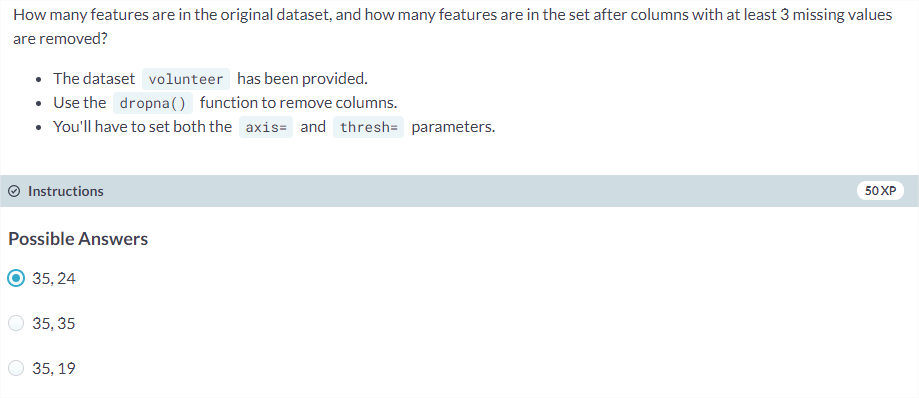

## Missing data - rows
Taking a look at the volunteer dataset again, we want to drop rows where the category_desc column values are missing. We're going to do this using boolean indexing, by checking to see if we have any null values, and then filtering the dataset so that we only have rows with those values.

### code

In [12]:
# Check how many values are missing in the category_desc column
print(volunteer['category_desc'].isnull().sum())

# Subset the volunteer dataset
volunteer_subset = volunteer[volunteer['category_desc'].notnull()]

# Print out the shape of the subset
print(volunteer_subset.shape)

48
(617, 35)


# Working with data types


## Exploring data types
Taking another look at the dataset comprised of volunteer information from New York City, we want to know what types we'll be working with as we start to do more preprocessing.

Which data types are present in the volunteer dataset?

The dataset volunteer has been provided.
Use the .dtypes attribute to check the datatypes.

In [13]:
volunteer.dtypes

opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int64
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64
Census Tract          float64
BIN                   float64
BBL       

## Converting a column type
If you take a look at the volunteer dataset types, you'll see that the column hits is type object. But, if you actually look at the column, you'll see that it consists of integers. Let's convert that column to type int.

In [14]:
# Print the head of the hits column
print(volunteer["hits"].head())

# Convert the hits column to type int
volunteer["hits"] = volunteer["hits"].astype(int)

# Look at the dtypes of the dataset
print(volunteer.dtypes)

0    737
1     22
2     62
3     14
4     31
Name: hits, dtype: int64
opportunity_id          int64
content_id              int64
vol_requests            int64
event_time              int64
title                  object
hits                    int32
summary                object
is_priority            object
category_id           float64
category_desc          object
amsl                  float64
amsl_unit             float64
org_title              object
org_content_id          int64
addresses_count         int64
locality               object
region                 object
postalcode            float64
primary_loc           float64
display_url            object
recurrence_type        object
hours                   int64
created_date           object
last_modified_date     object
start_date_date        object
end_date_date          object
status                 object
Latitude              float64
Longitude             float64
Community Board       float64
Community Council     float64


# Class distribution


## Class imbalance
In the volunteer dataset, we're thinking about trying to predict the category_desc variable using the other features in the dataset. First, though, we need to know what the class distribution (and imbalance) is for that label.

Which descriptions occur less than 50 times in the volunteer dataset?

The dataset volunteer has been provided.
The colum you want to check is category_desc.
Use the value_counts() method to check variable counts.

In [19]:
volunteer['category_desc'].value_counts()

Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64

## Stratified sampling
We know that the distribution of variables in the category_desc column in the volunteer dataset is uneven. If we wanted to train a model to try to predict category_desc, we would want to train the model on a sample of data that is representative of the entire dataset. Stratified sampling is a way to achieve this.

### code

In [20]:
from sklearn.model_selection import train_test_split

In [29]:
# Create a data with all columns except category_desc
volunteer_X = volunteer.drop('category_desc', axis=1)

# Create a category_desc labels dataset
volunteer_y = volunteer[['category_desc']]

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train, X_test, y_train, y_test = train_test_split(volunteer_X, volunteer_y, stratify=volunteer_y)

# Print out the category_desc counts on the training y labels
print(y_train['category_desc'].value_counts())

ValueError: Input contains NaN